# Geometric Intuation of perceptron

## 0. Geting proper import to start working 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
import mlxtend

## 1. Get the toy data and convert it into csv file

In [3]:
data=datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

we just see our data and it's properties. now let's see some important individual properties 

In [4]:
targets=data.target

In [5]:
cols=data.feature_names

In [6]:
values=data.data

In [7]:
class_dict={
    0:'setosa',1: 'versicolor', 2: 'virginica'
}
class_list=list()
for i in targets:
    class_list.append(class_dict[i])

### Let's convert the data into csv file. 

In [8]:
iris_csv=pd.DataFrame(data=values,columns=cols)
iris_csv.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
28,5.2,3.4,1.4,0.2
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
26,5.0,3.4,1.6,0.4


### simple modification to turns our data into two featues 

In [9]:
iris_csv['sepal area (cm_sq)']=iris_csv['sepal length (cm)']*iris_csv['sepal width (cm)']
iris_csv['petal area(cm_sq)']=iris_csv['petal length (cm)']*iris_csv['petal width (cm)']

### Add the class colums using target values

In [10]:
iris_csv['class']=targets
iris_csv['class_names']=class_list

In [11]:
iris_csv=iris_csv[iris_csv['class']!=2]
iris_csv.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm_sq),petal area(cm_sq),class,class_names
40,5.0,3.5,1.3,0.3,17.50,0.39,0,setosa
7,5.0,3.4,1.5,0.2,17.00,0.30,0,setosa
88,5.6,3.0,4.1,1.3,16.80,5.33,1,versicolor
67,5.8,2.7,4.1,1.0,15.66,4.10,1,versicolor
1,4.9,3.0,1.4,0.2,14.70,0.28,0,setosa


## 2. Lets Visualize Our data 

In [12]:
iris_csv.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm_sq),petal area(cm_sq),class,class_names
10,5.4,3.7,1.5,0.2,19.98,0.30,0,setosa
70,5.9,3.2,4.8,1.8,18.88,8.64,1,versicolor
98,5.1,2.5,3.0,1.1,12.75,3.30,1,versicolor
92,5.8,2.6,4.0,1.2,15.08,4.80,1,versicolor
64,5.6,2.9,3.6,1.3,16.24,4.68,1,versicolor


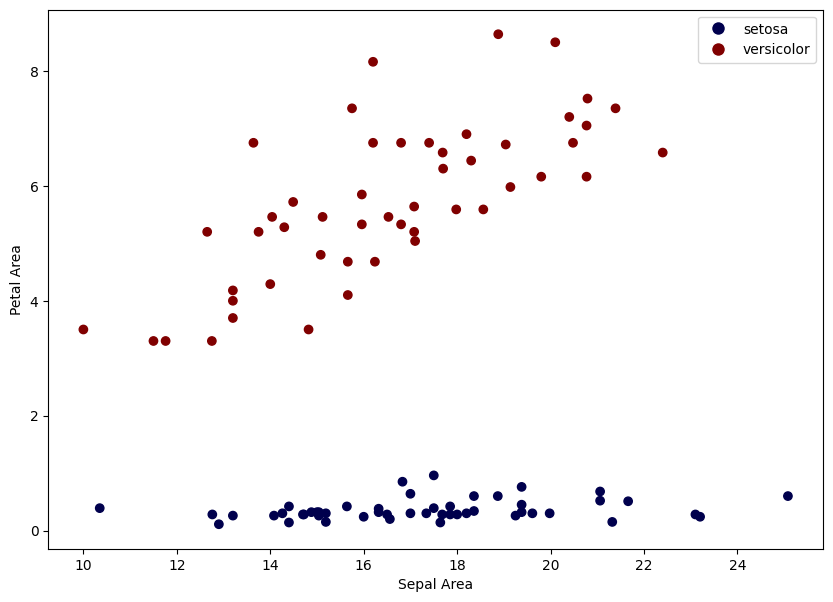

In [64]:
plt.figure(figsize=(10,7))
scatter=plt.scatter(x=(iris_csv['sepal length (cm)']*iris_csv['sepal width (cm)']),y=(iris_csv['petal length (cm)']*iris_csv['petal width (cm)']),c=iris_csv['class'],cmap='seismic')
plt.xlabel("Sepal Area")
plt.ylabel("Petal Area")
# Adding a legend
classes = iris_csv['class_names'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(classes))]
plt.legend(handles, classes)

# Show plot
plt.show()

## 3. Create Train and test data

As our data is ready and modifed properly , Let's create our Train and test data

In [14]:
iris_csv.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'sepal area (cm_sq)', 'petal area(cm_sq)', 'class',
       'class_names'],
      dtype='object')

In [15]:
X=iris_csv.iloc[:,4:6]
y=iris_csv.iloc[:,7]

In [16]:
# 0. import the `train_test_split `
from sklearn.model_selection import train_test_split

# 1. Create the train and test data

X_train,X_test,y_train,y_test=train_test_split(X,iris_csv['class'],test_size=.125,random_state=42,shuffle=True)

# 2. Let's our train test data shape

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87, 2), (13, 2), (87,), (13,))

## 4. Fit In the perceptron

In [17]:
# import linear model perceptron
from sklearn.linear_model import Perceptron

In [18]:
# 0. create instance of model
p=Perceptron()

# 1. Fit into the model
p.fit(X_train,y_train)

# 2. Check the coeffiecnt and intercept point of data
print(p.coef_,p.intercept_)


[[-3.68 18.98]] [0.]


## 5. Visualize result

As we fit our model , our model divided our dataset into two parts 

So it's time to visualize , visualize and visualize ......



c:\Users\shafe\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

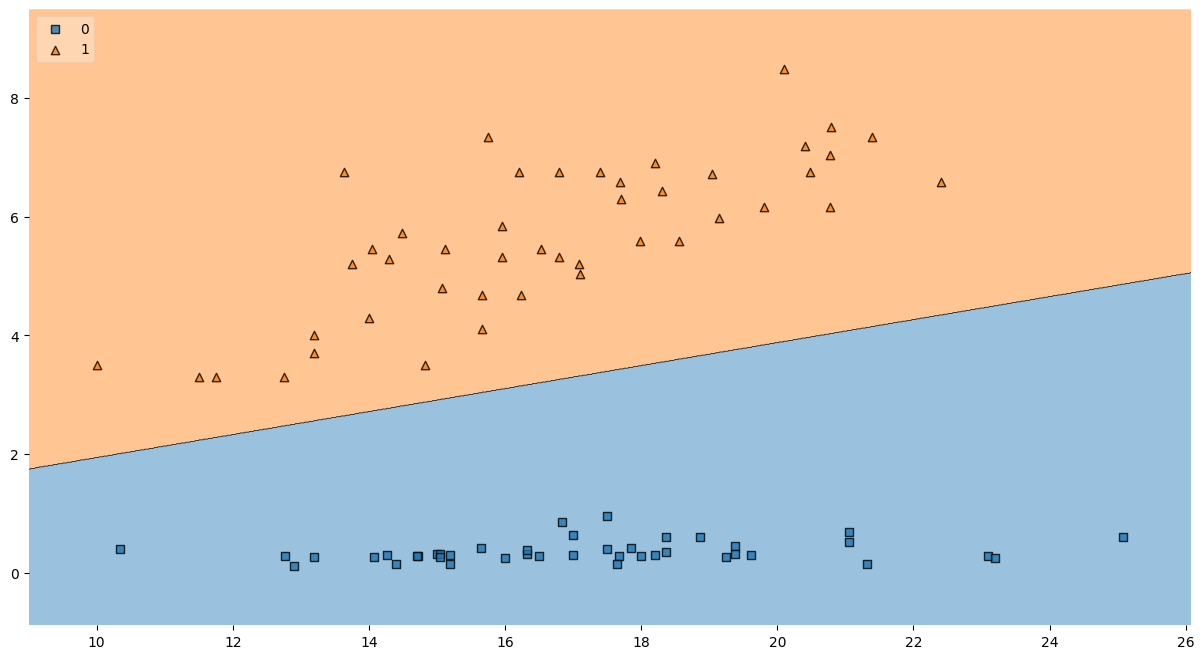

In [62]:
# 0. use mlxtend to plot the data
from mlxtend.plotting import plot_decision_regions

# 1. Plot the regions
plt.figure(figsize=(15,8))
plot_decision_regions(X_train.values,y_train.values,clf=p,legend=2)

## 6. Let's Predict and Ploting

In [26]:
y_pred=p.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

### 6.1 Let's visualize something interesting 

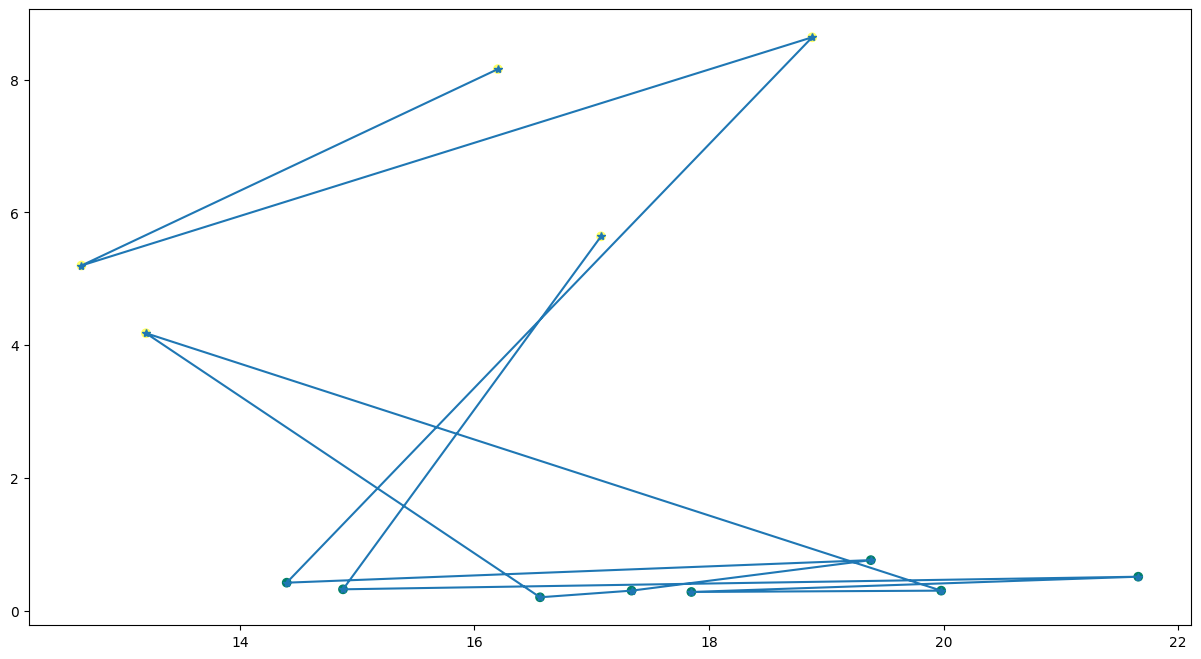

In [61]:
plt.figure(figsize=(15,8))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_test,cmap="summer")
plt.plot(X_test.iloc[:,0],X_test.iloc[:,1],data=y_pred,marker="*",)

Now look at the picture , We just predict everything exactly perfectly ........

## 7. Accuracy 

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print(accuracy)

1.0


**100% accuracy**